In [5]:
!pip install pmdarima


     -------------------------------------- 572.7/572.7 kB 1.0 MB/s eta 0:00:00


In [12]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

# Load stock data (e.g., from a CSV file)
data = pd.read_csv('stock_data.csv')

# Preprocessing: Selecting relevant columns and converting 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Selecting 'close' column for the analysis
data = data[['close']]

# Splitting data into training and testing sets
train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]

# Using Auto ARIMA to find optimal parameters
auto_arima_model = auto_arima(train_data, seasonal=False, stepwise=True, trace=True)

# Getting the optimal (p, d, q) parameters from Auto ARIMA
p, d, q = auto_arima_model.order

# Creating and training the ARIMA model with optimal parameters
model = ARIMA(train_data, order=(p, d, q))
model_fit = model.fit(disp=0)

# Making predictions on the test set
predictions = model_fit.forecast(steps=len(test_data))[0]

# Calculating Mean Squared Error
mse = mean_squared_error(test_data['close'], predictions)

# Plotting actual vs. predicted stock prices
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['close'], color='blue', label='Actual')
plt.plot(test_data.index, predictions, color='red', linewidth=2, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price (Close)')
plt.title('Stock Price Prediction using ARIMA with Auto ARIMA Parameters')
plt.legend()
plt.show()

print(f"Optimal (p, d, q) parameters: ({p}, {d}, {q})")
print(f"Mean Squared Error: {mse}")


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8678.468, Time=2.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8757.327, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8733.599, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8733.949, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8756.644, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8736.431, Time=1.30 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8712.561, Time=1.64 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8677.774, Time=3.33 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8709.859, Time=1.95 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=8713.808, Time=2.74 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=3.99 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=8678.202, Time=3.71 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=8710.120, Time=3.01 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=8717.368, Time=4.29 sec
 ARIMA(3,1,2)(0,0,0)[0]             : 

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [13]:
import matplotlib.pyplot as plt


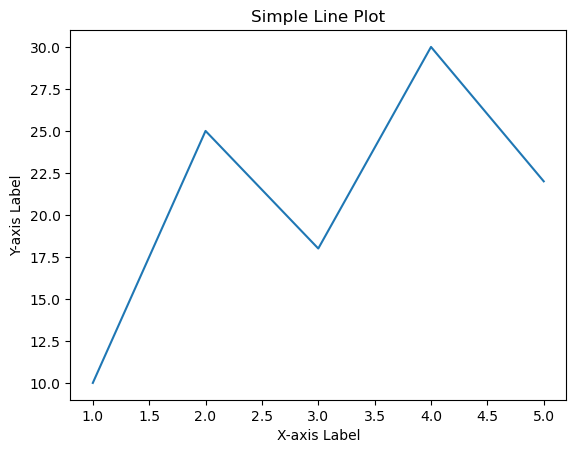

In [14]:
x = [1, 2, 3, 4, 5]
y = [10, 25, 18, 30, 22]

plt.plot(x, y)
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Simple Line Plot')
plt.show()


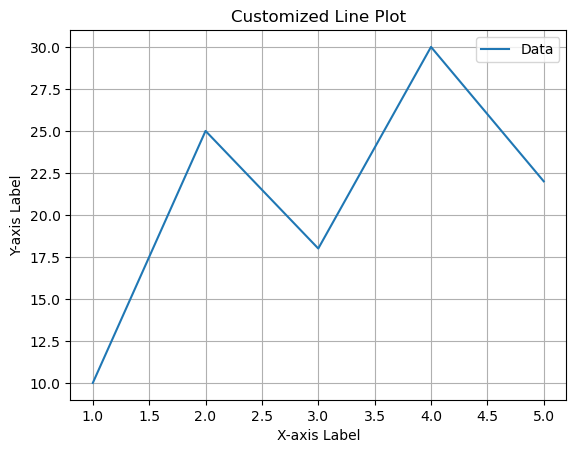

In [15]:
plt.plot(x, y, label='Data')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Customized Line Plot')
plt.legend()
plt.grid(True)
plt.show()
